**https://www.tensorflow.org/text/tutorials/classify_text_with_bert**

**https://www.youtube.com/watch?v=hOCDJyZ6quA**

**Mount Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Import Libraries**

In [ ]:
import os
import re
import sys
import numpy as np
from numpy import mean,std
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
import itertools
from itertools import chain, product
from itertools import zip_longest
import gensim
from gensim import corpora
from pprint import pprint
from gensim import models
from gensim.models import LdaModel
from gensim.models import Word2Vec
from gensim.models import TfidfModel
from gensim.models import CoherenceModel
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
from sklearn import utils
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, NuSVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from lightgbm import LGBMClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import train_test_split, RepeatedKFold
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics
import string
import nltk
from nltk.tokenize import RegexpTokenizer, word_tokenize, sent_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from sklearn.manifold import TSNE

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
#!pip install tensorflow_text
import tensorflow_text as text

**Load Datasets**

In [ ]:
Train_data = pd.read_csv('/content/drive/MyDrive/Natural Language Processing/Fake News Detection/Conference Paper/Data/COVID-19/Constraint_Train.csv')
Test_data = pd.read_csv('/content/drive/MyDrive/Natural Language Processing/Fake News Detection/Conference Paper/Data/COVID-19/Constraint_Test.csv')
Val_data = pd.read_csv('/content/drive/MyDrive/Natural Language Processing/Fake News Detection/Conference Paper/Data/COVID-19/Constraint_Val.csv')

In [ ]:
Train_data['label'] = Train_data['label'].apply(lambda x: 1 if x == 'real' else 0)
Val_data['label'] = Val_data['label'].apply(lambda x: 1 if x == 'real' else 0)

In [ ]:
Train_data.head()

,id,tweet,label
0,1,The CDC currently reports 99031 deaths. In gen...,1
1,2,States reported 1121 deaths a small rise from ...,1
2,3,Politically Correct Woman (Almost) Uses Pandem...,0
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,1
4,5,Populous states can generate large case counts...,1


In [ ]:
Val_data.head()

,id,tweet,label
0,1,Chinese converting to Islam after realising th...,0
1,2,11 out of 13 people (from the Diamond Princess...,0
2,3,"COVID-19 Is Caused By A Bacterium, Not Virus A...",0
3,4,Mike Pence in RNC speech praises Donald Trump’...,0
4,5,6/10 Sky's @EdConwaySky explains the latest #C...,1


In [ ]:
Test_data.head()

,id,tweet
0,1,Our daily update is published. States reported...
1,2,Alfalfa is the only cure for COVID-19.
2,3,President Trump Asked What He Would Do If He W...
3,4,States reported 630 deaths. We are still seein...
4,5,This is the sixth time a global health emergen...


In [ ]:
Train_data.shape, Val_data.shape, Test_data.shape

((6420, 3), (2140, 3), (2140, 2))

**Text Preprocessing**

In [ ]:
# NLP pre-processing
# remove urls, handles, and the hashtag from hashtags 
# (taken from https://stackoverflow.com/questions/8376691/how-to-remove-hashtag-user-link-of-a-tweet-using-regular-expression)
def remove_urls(text):
  new_text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text).split())
  return new_text

# make all text lowercase
def text_lowercase(text): 
  return text.lower()

# remove numbers
def remove_numbers(text): 
  result = re.sub(r'\d+', '', text) 
  return result

# remove punctuation
def remove_punctuation(text): 
  translator = str.maketrans('', '', string.punctuation)
  return text.translate(translator)

# function for all pre-processing steps
def preprocessing(text):
  text = text_lowercase(text)
  text = remove_urls(text)
  text = remove_numbers(text)
  text = remove_punctuation(text)
  return text

In [ ]:
# pre-processing the Train text
train = []
for i in Train_data['tweet']:
  # check if string
  if isinstance(i, str):
    train_data = preprocessing(i)
    train.append(train_data)
   # if not string
  else:
    train.append(np.NaN)

# add pre-processed column to dataset
Train_data['clean_text'] = train

In [ ]:
# pre-processing the Val text
val = []
for j in Val_data['tweet']:
  # check if string
  if isinstance(j, str):
    val_data = preprocessing(j)
    val.append(val_data)
   # if not string
  else:
    val.append(np.NaN)

# add pre-processed column to dataset
Val_data['clean_text'] = val

In [ ]:
# pre-processing the Test text
test = []
for k in Test_data['tweet']:
  # check if string
  if isinstance(k, str):
    test_data = preprocessing(k)
    test.append(test_data)
   # if not string
  else:
    test.append(np.NaN)

# add pre-processed column to dataset
Test_data['clean_text'] = test

In [ ]:
Train_data.head()

,id,tweet,label,clean_text
0,1,The CDC currently reports 99031 deaths. In gen...,1,the cdc currently reports deaths in general t...
1,2,States reported 1121 deaths a small rise from ...,1,states reported deaths a small rise from last...
2,3,Politically Correct Woman (Almost) Uses Pandem...,0,politically correct woman almost uses pandemic...
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,1,indiafightscorona we have covid testing labor...
4,5,Populous states can generate large case counts...,1,populous states can generate large case counts...


In [ ]:
Val_data.head()

,id,tweet,label,clean_text
0,1,Chinese converting to Islam after realising th...,0,chinese converting to islam after realising th...
1,2,11 out of 13 people (from the Diamond Princess...,0,out of people from the diamond princess crui...
2,3,"COVID-19 Is Caused By A Bacterium, Not Virus A...",0,covid is caused by a bacterium not virus and ...
3,4,Mike Pence in RNC speech praises Donald Trump’...,0,mike pence in rnc speech praises donald trump ...
4,5,6/10 Sky's @EdConwaySky explains the latest #C...,1,sky s explains the latest covid data and gov...


In [ ]:
Test_data.head()

,id,tweet,clean_text
0,1,Our daily update is published. States reported...,our daily update is published states reported ...
1,2,Alfalfa is the only cure for COVID-19.,alfalfa is the only cure for covid
2,3,President Trump Asked What He Would Do If He W...,president trump asked what he would do if he w...
3,4,States reported 630 deaths. We are still seein...,states reported deaths we are still seeing a ...
4,5,This is the sixth time a global health emergen...,this is the sixth time a global health emergen...


In [ ]:
Train_data.shape, Val_data.shape, Test_data.shape

((6420, 4), (2140, 4), (2140, 3))

**Splitting Dataset**

In [ ]:
X_train = Train_data['clean_text'][0:2000]
y_train = Train_data['label'][0:2000]

X_test = Val_data['clean_text'][0:2000]
y_test = Val_data['label'][0:2000]

In [ ]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
y_train

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [ ]:
y_test

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [ ]:
y_train.shape, y_test.shape

((2000, 2), (2000, 2))

In [ ]:
"""
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.80, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape
"""

'\nfrom sklearn.model_selection import train_test_split\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.80, random_state=42)\nX_train.shape, y_train.shape, X_test.shape, y_test.shape\n'

**Tensorflow**

In [ ]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [ ]:
def get_sentence_embeding(sentences):
    preprocessed_text = bert_preprocess(sentences)
    return bert_encoder(preprocessed_text)['pooled_output']

In [ ]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output']) # 1st hiden layer
l = tf.keras.layers.Dropout(0.1, name="second")(l) # hiden layer 2
l = tf.keras.layers.Dropout(0.2, name="third")(l)
l = tf.keras.layers.Dense(2, activation='softmax', name="output")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_word_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128)}                                                      

In [ ]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

**Model Training**

In [ ]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
63/63 [==============================] - 57s 653ms/step - loss: 0.7002 - accuracy: 0.5990 - precision: 0.5990 - recall: 0.5990
Epoch 2/10
63/63 [==============================] - 42s 660ms/step - loss: 0.6165 - accuracy: 0.6935 - precision: 0.6935 - recall: 0.6935
Epoch 3/10
63/63 [==============================] - 41s 653ms/step - loss: 0.5826 - accuracy: 0.7140 - precision: 0.7140 - recall: 0.7140
Epoch 4/10
63/63 [==============================] - 41s 654ms/step - loss: 0.5631 - accuracy: 0.7365 - precision: 0.7365 - recall: 0.7365
Epoch 5/10
63/63 [==============================] - 41s 652ms/step - loss: 0.5326 - accuracy: 0.7625 - precision: 0.7625 - recall: 0.7625
Epoch 6/10
63/63 [==============================] - 41s 650ms/step - loss: 0.5177 - accuracy: 0.7645 - precision: 0.7645 - recall: 0.7645
Epoch 7/10
63/63 [==============================] - 41s 653ms/step - loss: 0.5077 - accuracy: 0.7785 - precision: 0.7785 - recall: 0.7785
Epoch 8/10
63/63 [================

**Model Testing**

In [ ]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 42s 652ms/step - loss: 0.4440 - accuracy: 0.8200 - precision: 0.8200 - recall: 0.8200


[0.4439966082572937,
 0.8199999928474426,
 0.8199999928474426,
 0.8199999928474426]

In [ ]:
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()

y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted

array([1, 0, 1, ..., 0, 1, 0])

In [ ]:
y_test = np.where(y_test > 0.5, 1, 0)
y_test = y_test.flatten()
y_test

array([1, 0, 1, ..., 0, 1, 0])

In [ ]:
type(y_predicted)

numpy.ndarray

In [ ]:
type(y_test)

numpy.ndarray

In [ ]:
y_test.shape, y_predicted.shape

((4000,), (4000,))

**Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_predicted)
cm 

array([[1640,  360],
       [ 360, 1640]])

Text(33.0, 0.5, 'Truth')

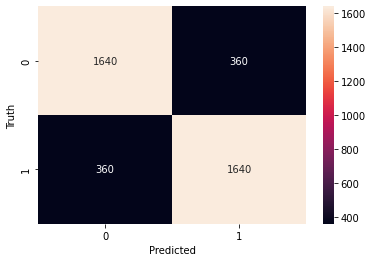

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      2000
           1       0.82      0.82      0.82      2000

    accuracy                           0.82      4000
   macro avg       0.82      0.82      0.82      4000
weighted avg       0.82      0.82      0.82      4000



**Inference (Testing on Unknown Data)**

In [ ]:
reviews = [
    'Enter a chance to win $5000, hurry up, offer valid until march 31, 2021',
    'You are awarded a SiPix Digital Camera! call 09061221061 from landline. Delivery within 28days. T Cs Box177. M221BP. 2yr warranty. 150ppm. 16 . p pÂ£3.99',
    'it to 80488. Your 500 free text messages are valid until 31 December 2005.',
    'Hey Sam, Are you coming for a cricket game tomorrow',
    "Why don't you wait 'til at least wednesday to see if you get your ."
]
model.predict(reviews)

array([[0.10530435, 0.89469564],
       [0.08164969, 0.91835034],
       [0.12880872, 0.8711913 ],
       [0.45998216, 0.54001784],
       [0.6581097 , 0.34189028]], dtype=float32)

**Testing on our Unlabelled Data (Test_data)**

In [ ]:
Test_data.head()

,id,tweet,clean_text
0,1,Our daily update is published. States reported...,our daily update is published states reported ...
1,2,Alfalfa is the only cure for COVID-19.,alfalfa is the only cure for covid
2,3,President Trump Asked What He Would Do If He W...,president trump asked what he would do if he w...
3,4,States reported 630 deaths. We are still seein...,states reported deaths we are still seeing a ...
4,5,This is the sixth time a global health emergen...,this is the sixth time a global health emergen...


In [ ]:
Test_data.shape

(2140, 3)

In [ ]:
my_testing_data = Test_data['clean_text']
gyan = model.predict(my_testing_data)

In [ ]:
gyan

array([[0.03884206, 0.961158  ],
       [0.9711003 , 0.02889976],
       [0.86932105, 0.13067895],
       ...,
       [0.06072808, 0.939272  ],
       [0.21513802, 0.784862  ],
       [0.6225339 , 0.37746608]], dtype=float32)

In [ ]:
gyan.shape

(2140, 2)

In [ ]:
type(gyan)

numpy.ndarray

In [ ]:
final_result = []
for i in gyan:
  final_result.append(np.argmax(i))

In [ ]:
final_result = np.ravel(final_result)
final_result

array([1, 0, 0, ..., 1, 1, 0])

In [ ]:
final_result.shape

(2140,)

In [ ]:
type(final_result)

numpy.ndarray

In [ ]:
Test_data['Output_Labels'] = final_result
Test_data.head()

,id,tweet,clean_text,Output_Labels
0,1,Our daily update is published. States reported...,our daily update is published states reported ...,1
1,2,Alfalfa is the only cure for COVID-19.,alfalfa is the only cure for covid,0
2,3,President Trump Asked What He Would Do If He W...,president trump asked what he would do if he w...,0
3,4,States reported 630 deaths. We are still seein...,states reported deaths we are still seeing a ...,1
4,5,This is the sixth time a global health emergen...,this is the sixth time a global health emergen...,1
